In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style()

from pymutspec.annotation import rev_comp

## Read data

In [2]:
# path_to_data = "../data/MutSpecVertebratescytb.csv"
path_to_data = "../data/new_dataset/MutSpecVertebrates192.csv.gz"
mutspec_all = pd.read_csv(path_to_data)
mutspec = mutspec_all[mutspec_all.Gene == 'Cytb']
print(mutspec.shape, mutspec.shape[0] / 192)
mutspec.head()

(325824, 7) 1697.0


,Gene,Class,Species,Mut,Observed,Expected,MutSpec
39552,Cytb,Mammalia,Tarsius_dentatus,A[A>C]A,NaN,0.00,0.0
39553,Cytb,Mammalia,Tarsius_dentatus,A[A>C]C,NaN,0.00,0.0
39554,Cytb,Mammalia,Tarsius_dentatus,A[A>C]G,NaN,0.00,0.0
39555,Cytb,Mammalia,Tarsius_dentatus,A[A>C]T,NaN,0.00,0.0
39556,Cytb,Mammalia,Tarsius_dentatus,C[A>C]A,NaN,11.95,0.0


## Number of observed mutations

In [13]:
obs_cnt.agg({'Observed': ['sum', 'min']}).iloc[:, :-1]

Observed
                            sum
Gene Class                     
CO1  Actinopteri    2923.970926
     Amphibia        856.819439
     Aves           1155.457692
     Lepidosauria    306.217706
     Mammalia       6629.380070
CO3  Actinopteri     802.331026
     Amphibia        193.709026
     Aves            306.111516
     Lepidosauria    132.922519
     Mammalia       3948.872380
Cytb Actinopteri   35742.050503
     Amphibia       6124.401936
     Aves           6043.019221
     Lepidosauria  13735.871862
     Mammalia      56751.553969
ND2  Actinopteri    5678.356932
     Amphibia       5612.477718
     Aves          16657.449283
     Lepidosauria  18333.422731
     Mammalia       7319.162485

In [15]:
obs_cnt = mutspec_all.groupby(['Gene', 'Class', 'Species']).Observed.sum()\
    .reset_index().groupby(['Gene', 'Class'])
obs_cnt_descr = obs_cnt.describe()
obs_cnt_descr = obs_cnt_descr.join(obs_cnt.agg({'Observed': ['sum', 'min']}).iloc[:, :-1])
obs_cnt_descr.to_csv('../data/obs_cnt_descr.csv')
obs_cnt_descr

Observed                                               \
                     count       mean         std        min        25%   
Gene Class                                                                
CO1  Actinopteri      44.0  66.453885   95.295531  21.096459  28.955174   
     Amphibia         13.0  65.909188   66.499211  23.271992  32.018867   
     Aves             29.0  39.843369   25.162669  20.995400  26.815295   
     Lepidosauria      8.0  38.277213   19.085937  21.191083  24.461687   
     Mammalia        112.0  59.190893   61.790286  20.958530  28.187037   
CO3  Actinopteri      23.0  34.883958   13.953511  20.258853  23.870231   
     Amphibia          7.0  27.672718    6.418633  20.672327  24.102380   
     Aves              8.0  38.263940   20.091295  22.976030  26.456761   
     Lepidosauria      4.0  33.230630   13.872830  23.762327  25.735004   
     Mammalia         71.0  55.617921   57.869625  20.089888  26.708835   
Cytb Actinopteri     523.0  68.340441   70.013633  20.023799  30.535650   
     Amphibia         76.0  80.584236   67.872187  20.693277  34.331931   
     Aves            130.0  46.484763   31.309813  20.561882  27.613898   
     Lepidosauria    177.0  77.603796   84.188067  20.005172  30.526754   
     Mammalia        791.0  71.746592   71.194969  20.131674  31.145857   
ND2  Actinopteri     103.0  55.129679   45.474027  20.025607  28.855128   
     Amphibia         86.0  65.261369   64.478647  21.330734  30.352286   
     Aves            345.0  48.282462   32.538516  20.100389  26.937545   
     Lepidosauria    190.0  96.491699  128.575862  20.171202  34.387048   
     Mammalia        126.0  58.088591   49.242876  20.845968  27.941061   

                                                                    
                         50%         75%         max           sum  
Gene Class                                                          
CO1  Actinopteri   36.102257   60.425221  632.356939   2923.970926  
     Amphibia      37.781653   50.906871  253.550886    856.819439  
     Aves          30.994310   43.976490  150.082086   1155.457692  
     Lepidosauria  33.773359   44.550088   78.476249    306.217706  
     Mammalia      39.440218   63.559570  473.105313   6629.380070  
CO3  Actinopteri   31.354148   41.832303   69.867031    802.331026  
     Amphibia      25.668032   30.717937   37.728032    193.709026  
     Aves          30.941856   39.407160   82.920718    306.111516  
     Lepidosauria  27.683256   35.178882   53.793679    132.922519  
     Mammalia      37.998590   62.454235  443.897260   3948.872380  
Cytb Actinopteri   42.986146   75.835146  543.943399  35742.050503  
     Amphibia      54.411805   88.542954  331.518106   6124.401936  
     Aves          35.985021   51.947056  207.368663   6043.019221  
     Lepidosauria  46.709556   93.284094  547.042374  13735.871862  
     Mammalia      46.829298   80.551986  661.120470  56751.553969  
ND2  Actinopteri   36.416385   61.480511  267.084207   5678.356932  
     Amphibia      42.900331   78.145753  382.815882   5612.477718  
     Aves          35.956045   58.602888  235.191019  16657.449283  
     Lepidosauria  50.153365  101.908762  852.600181  18333.422731  
     Mammalia      40.830568   68.929660  395.697558   7319.162485

In [38]:
mutspec_all['is_ts'] = mutspec_all.Mut.str.slice(2, 5).isin(['C>T', 'T>C', 'A>G', 'G>A'])

In [39]:
ts_frac = mutspec_all.groupby(['Gene', 'Class', 'Species', 'is_ts']).MutSpec.sum().unstack()[True]
ts_frac

Gene  Class        Species                 
CO1   Actinopteri  Anarhichas_lupus            0.618986
                   Anguilla_anguilla           0.715580
                   Anguilla_rostrata           0.981038
                   Boreogadus_saida            0.928080
                   Carassius_auratus           0.939294
                                                 ...   
ND2   Mammalia     Tylonycteris_pachypus       0.985231
                   Urocyon_cinereoargenteus    0.985905
                   Ursus_arctos                0.972871
                   Ursus_thibetanus            1.000000
                   Ziphius_cavirostris         0.952360
Name: True, Length: 2866, dtype: float64

In [41]:
ts_frac.mean(level=[0,1]).unstack()

Class,Actinopteri,Amphibia,Aves,Lepidosauria,Mammalia
Gene,,,,,
CO1,0.862643,0.902447,0.941554,0.819636,0.921393
CO3,0.864544,0.858330,0.903155,0.911313,0.923001
Cytb,0.872741,0.889277,0.924227,0.883114,0.900150
ND2,0.854212,0.881676,0.922048,0.866894,0.954649


In [46]:
ts_frac_descr = ts_frac.rename('ts_frac').reset_index().groupby(['Gene', 'Class']).ts_frac.describe()
ts_frac_descr.to_csv('../data/ts_frac_descr.csv')
ts_frac_descr

count      mean       std       min       25%       50%  \
Gene Class                                                                   
CO1  Actinopteri    44.0  0.862643  0.099804  0.618986  0.801528  0.894258   
     Amphibia       13.0  0.902447  0.080519  0.742775  0.859197  0.900290   
     Aves           29.0  0.941554  0.050986  0.779403  0.922138  0.947819   
     Lepidosauria    8.0  0.819636  0.119628  0.642410  0.742509  0.817645   
     Mammalia      112.0  0.921393  0.097130  0.537607  0.886857  0.958582   
CO3  Actinopteri    23.0  0.864544  0.104744  0.589098  0.836702  0.860090   
     Amphibia        7.0  0.858330  0.085173  0.740919  0.814992  0.828672   
     Aves            8.0  0.903155  0.212766  0.378003  0.960247  0.972706   
     Lepidosauria    4.0  0.911313  0.060870  0.861519  0.882290  0.891866   
     Mammalia       71.0  0.923001  0.114290  0.261995  0.903595  0.957128   
Cytb Actinopteri   523.0  0.872741  0.113374  0.200162  0.827750  0.894115   
     Amphibia       76.0  0.889277  0.085236  0.487148  0.856976  0.900393   
     Aves          130.0  0.924227  0.101873  0.366442  0.920653  0.956475   
     Lepidosauria  177.0  0.883114  0.094250  0.501159  0.837822  0.902401   
     Mammalia      791.0  0.900150  0.101899  0.240780  0.862028  0.925373   
ND2  Actinopteri   103.0  0.854212  0.140506  0.323879  0.807390  0.888608   
     Amphibia       86.0  0.881676  0.090048  0.637125  0.834705  0.891804   
     Aves          345.0  0.922048  0.100391  0.260028  0.901164  0.956089   
     Lepidosauria  190.0  0.866894  0.116701  0.127999  0.827957  0.890129   
     Mammalia      126.0  0.954649  0.055914  0.738804  0.939868  0.974115   

                        75%       max  
Gene Class                             
CO1  Actinopteri   0.948200  0.982399  
     Amphibia      0.971369  1.000000  
     Aves          0.984973  1.000000  
     Lepidosauria  0.920022  0.957189  
     Mammalia      0.984693  1.000000  
CO3  Actinopteri   0.950395  1.000000  
     Amphibia      0.904367  1.000000  
     Aves          0.986333  1.000000  
     Lepidosauria  0.920889  1.000000  
     Mammalia      0.986922  1.000000  
Cytb Actinopteri   0.948718  1.000000  
     Amphibia      0.944967  1.000000  
     Aves          0.978535  1.000000  
     Lepidosauria  0.949641  1.000000  
     Mammalia      0.969502  1.000000  
ND2  Actinopteri   0.952465  1.000000  
     Amphibia      0.954778  1.000000  
     Aves          0.982166  1.000000  
     Lepidosauria  0.936748  1.000000  
     Mammalia      0.995288  1.000000

In [3]:
mutspec["IsObserved"] = mutspec["Observed"] > 0
mutspec.head(2)

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,IsObserved
39552,Cytb,Mammalia,Tarsius_dentatus,A[A>C]A,NaN,0.0,0.0,False
39553,Cytb,Mammalia,Tarsius_dentatus,A[A>C]C,NaN,0.0,0.0,False


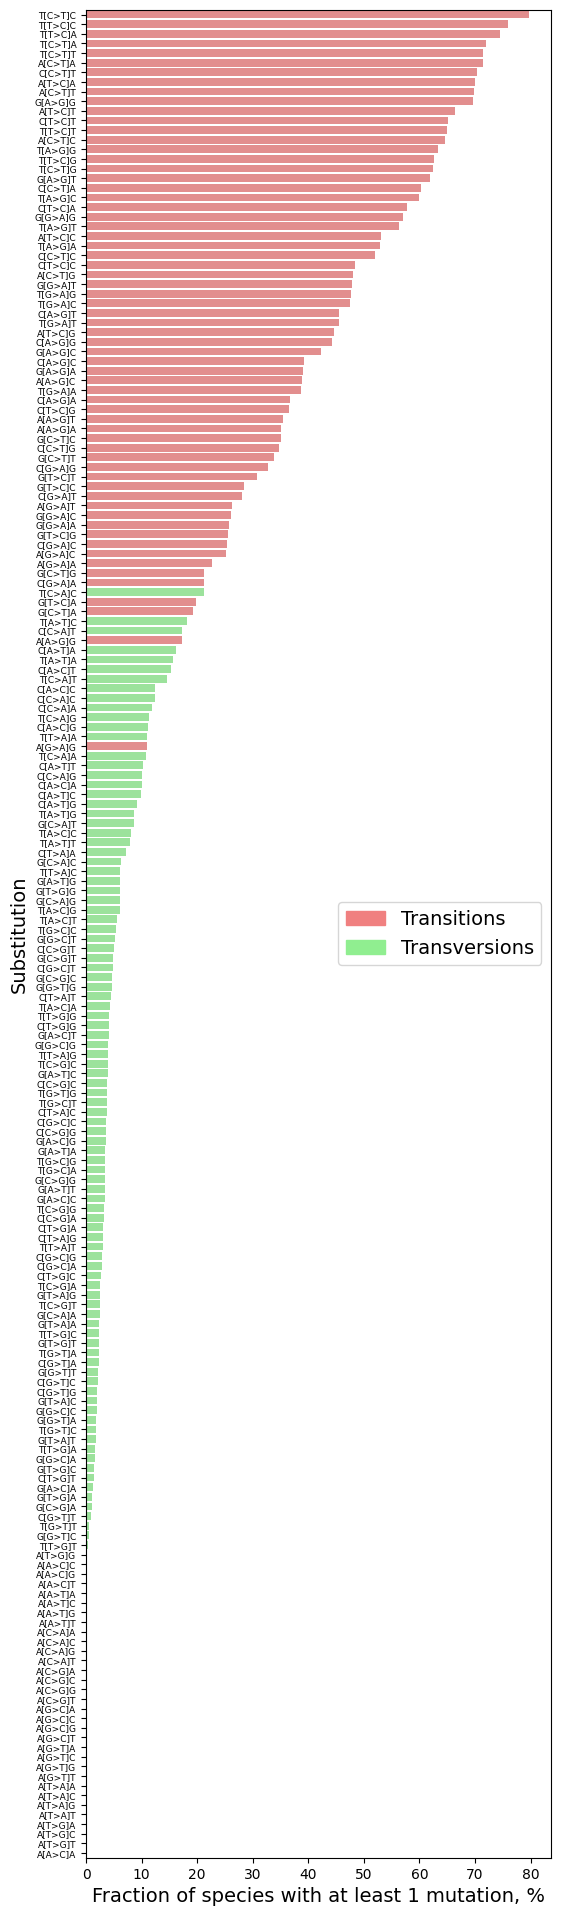

In [4]:
mcounts = mutspec.groupby("Mut").IsObserved.value_counts().rename("Count").reset_index().pivot('Mut','IsObserved', "Count").fillna(0).sort_values(False)
mcounts[False] = mcounts[False].astype("int")
mcounts[True] = mcounts[True].astype("int")
mcounts.columns.name = None
mcounts["Abundance"] = mcounts[True] / (mcounts[True] + mcounts[False]) * 100


clr1 = "lightcoral"
clr2 = "lightgreen"
mcounts["Color"] = [clr1 if x[2:5] in ['A>G', 'C>T', 'G>A', 'T>C'] else clr2 for x in mcounts.index.values]


patch1 = mpatches.Patch(color=clr1, label='Transitions')
patch2 = mpatches.Patch(color=clr2, label='Transversions')

plt.figure(figsize=(6, 24))
ax = sns.barplot(data=mcounts, y=mcounts.index, x="Abundance", 
            palette=mcounts.Color,
)
plt.yticks(rotation=0, fontsize=6.5)
plt.xlabel("Fraction of species with at least 1 mutation, %", fontsize=14)
plt.ylabel("Substitution", fontsize=14)
ax.legend(loc='center right', handles=[patch1, patch2], fontsize=14)
plt.savefig("../ToPaper/SupplementaryFigure3.pdf", bbox_inches='tight')
plt.show()

Text(529.9027777777778, 0.5, '')

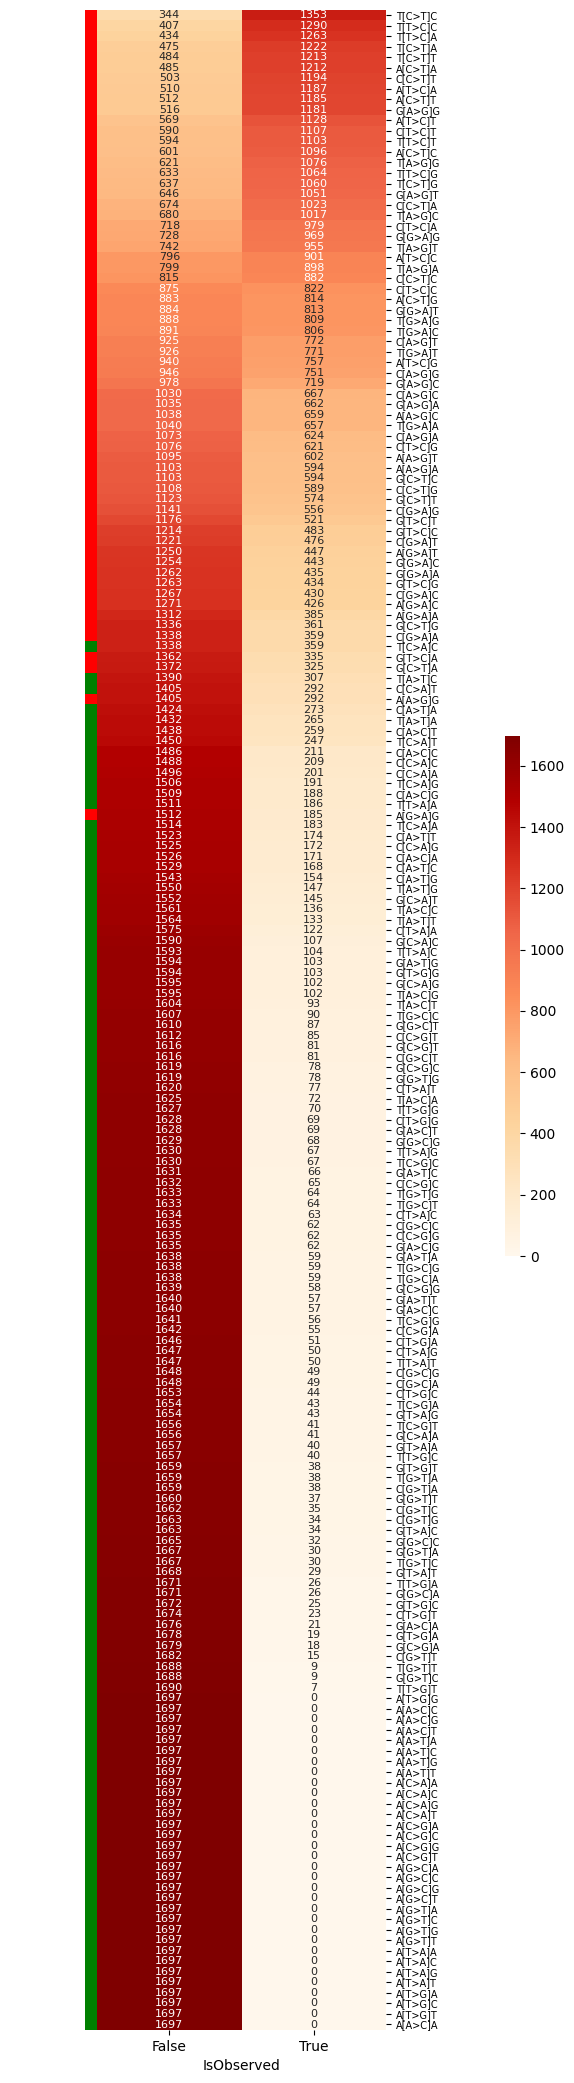

In [5]:
mcounts = mutspec.groupby("Mut").IsObserved.value_counts().rename("Count").reset_index().pivot('Mut','IsObserved', "Count").fillna(0).sort_values(False)
mcounts[False] = mcounts[False].astype("int")
mcounts[True] = mcounts[True].astype("int")

grd = sns.clustermap(
    data=mcounts,
    cmap="OrRd",
    figsize=(5, 26),
    col_cluster=False, row_cluster=False,
    cbar_pos=(1.02, .32, .03, .2),
    yticklabels=mcounts.index,
    annot=True,
    fmt=".0f",
    annot_kws={'fontsize': 8},
    row_colors=pd.Series(mcounts.index).apply(lambda x: "red" if x[2:5] in ['A>G', 'C>T', 'G>A', 'T>C'] else "green").values
)
plt.setp(grd.ax_heatmap.get_yticklabels(), size=7,)
grd.ax_col_dendrogram.remove()
grd.ax_heatmap.set_ylabel("")
# grd.ax_heatmap.set_xlabel("Number of species")
# grd.savefig("../pictures/sbs_counts.pdf")